In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
def get_data(name, file):
    data = open(file, "r")
    data_log = []
    
    for line in data:
        if len(line) > 1000:  # cir을 갖는 line
            data_log.append(line)
            
    print("len(data_log): ", len(data_log))
    
    processed_data = []
    
    for i in data_log:
        if any(c.isalpha() for c in i):
        # "RSMPL(01)" 문자열의 위치 찾기
            index = i.find("RSMPL")
            # 해당 위치가 유효한 경우
            if index != -1:
                # "RSMPL(01)"까지의 문자열 제거
                i = i[index + len("RSMPL")+4:]
                processed_data.append(i)
            else:
                # "RSMPL(01)" 문자열이 없는 경우, 원본 데이터 추가
                processed_data.append(i)
        else:
            # 알파벳이 없는 경우, 원본 데이터 추가
            processed_data.append(i)
        
    data_log = processed_data
    raw_data = []
    for i in range(len(data_log)):
        data_sample = [int(x) for x in data_log[i].strip().split(",") if x]
        raw_data.append(data_sample)
        
    count = 0
    for i in range(len(raw_data)):
        if len(raw_data[i]) > 1016:
            count += 1
    print("not 1016: ",count)
    if count != 0:
        for i in range(len(raw_data)):
            if len(raw_data[i]) > 1016:
                raw_data[i] = raw_data[i][1016:]
    
    count = 0
    for i in range(len(raw_data)):
        if len(raw_data[i]) != 1016:
            count += 1
    print("after: ",count)
    
    raw_data = pd.DataFrame(raw_data)
    
    abs_normalized_data = raw_data.abs()
    abs_normalized_data = abs_normalized_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

    
    abs_normalized_data.to_csv(name)
    print(len(raw_data))

In [34]:
get_data("experiment_1/angle_90_distance_10cm.csv", "20240707-132727_DecaWaveAllAccum_a90d10.log")

len(data_log):  3076
not 1016:  48
after:  0
3076


In [35]:
a90d10 = pd.read_csv("experiment_1/angle_90_distance_10cm.csv")
print(a90d10.shape)

(3076, 1017)


In [37]:
get_data("experiment_1/angle_0_distance_10cm.csv", "20240705-175445_DecaWaveAllAccum.log")
get_data("experiment_1/angle_180_distance_10cm.csv", "20240707-135548_DecaWaveAllAccum_a180d10.log")
get_data("experiment_1/angle_0_distance_50cm.csv", "20240707-142526_DecaWaveAllAccum_a0d50.log")
get_data("experiment_1/angle_90_distance_50cm.csv", "20240707-145712_DecaWaveAllAccum_a90d50.log")
get_data("experiment_1/angle_180_distance_50cm.csv", "20240707-152344_DecaWaveAllAccum_a180d50.log")
get_data("experiment_1/angle_0_distance_100cm.csv", "20240707-155119_DecaWaveAllAccum_a0d100.log")

len(data_log):  2701
not 1016:  539
after:  0
2701
len(data_log):  3195
not 1016:  32
after:  0
3195
len(data_log):  3347
not 1016:  27
after:  0
3347
len(data_log):  2845
not 1016:  26
after:  0
2845
len(data_log):  2816
not 1016:  31
after:  0
2816
len(data_log):  2537
not 1016:  37
after:  0
2537


# data split

In [3]:
empty = empty = pd.read_csv("experiment_1/empty.csv", index_col=0)
print(empty.shape)
a0d10 = pd.read_csv("experiment_1/angle_0_distance_10cm.csv", index_col=0)
print(a0d10.shape)
a90d10 = pd.read_csv("experiment_1/angle_90_distance_10cm.csv", index_col=0)
print(a90d10.shape)
a180d10 = pd.read_csv("experiment_1/angle_180_distance_10cm.csv", index_col=0)
print(a180d10.shape)
a0d50 = pd.read_csv("experiment_1/angle_0_distance_50cm.csv", index_col=0)
print(a0d50.shape)
a90d50 = pd.read_csv("experiment_1/angle_90_distance_50cm.csv", index_col=0)
print(a90d50.shape)
a180d50 = pd.read_csv("experiment_1/angle_180_distance_50cm.csv", index_col=0)
print(a180d50.shape)
a0d100 = pd.read_csv("experiment_1/angle_0_distance_100cm.csv", index_col=0)
print(a0d100.shape)

(3540, 1016)
(2701, 1016)
(3076, 1016)
(3195, 1016)
(3347, 1016)
(2845, 1016)
(2816, 1016)
(2537, 1016)


# empty상황과 거리가 10인 3가지 경우를 분류

In [11]:
label = [0]*3540 + [1]*(2701+3076+3195)  # empty의 0과 나머지를 1로
label = pd.DataFrame(label)
len(label)

12512

In [12]:
train = pd.concat([empty, a0d10, a90d10, a180d10], ignore_index=True)
train.shape

(12512, 1016)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(train, label, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(10009, 1016) (2503, 1016) (10009, 1) (2503, 1)


In [14]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(1016,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1013, 10)          50        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1009, 20)          1020      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 504, 20)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10080)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10081     
Total params: 11,151
Trainable params: 11,151
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 입력 데이터에 채널 차원 추가 (Conv1D를 위해)
X_train = np.expand_dims(X_train, axis=-1) # 채널 차원 추가
print(X_train.shape)
X_test = np.expand_dims(X_test, axis=-1)
print(X_test.shape)

(10009, 1016, 1)
(2503, 1016, 1)


In [16]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
313/313 [==============================] - 4s 14ms/step - loss: 0.3949 - accuracy: 0.8451 - val_loss: 0.2558 - val_accuracy: 0.9229
Epoch 2/20
313/313 [==============================] - 4s 13ms/step - loss: 0.2197 - accuracy: 0.9194 - val_loss: 0.1896 - val_accuracy: 0.9189
Epoch 3/20
313/313 [==============================] - 4s 14ms/step - loss: 0.1790 - accuracy: 0.9268 - val_loss: 0.1883 - val_accuracy: 0.9237
Epoch 4/20
313/313 [==============================] - 4s 13ms/step - loss: 0.1454 - accuracy: 0.9379 - val_loss: 0.1754 - val_accuracy: 0.9309
Epoch 5/20
313/313 [==============================] - 4s 13ms/step - loss: 0.1271 - accuracy: 0.9478 - val_loss: 0.1255 - val_accuracy: 0.9445
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 0.1136 - accuracy: 0.9546 - val_loss: 0.1182 - val_accuracy: 0.9493
Epoch 7/20
313/313 [==============================] - 4s 13ms/step - loss: 0.0971 - accuracy: 0.9619 - val_loss: 0.1131 - val_accuracy: 0.9553

79/79 - 0s - loss: 0.1456 - accuracy: 0.9668


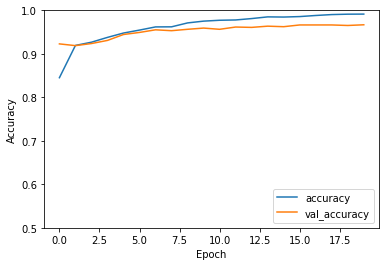

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

# empty상황과 거리가 50인 3가지 경우를 분류

In [18]:
label = [0]*3540 + [1]*(3347+2845+2816)  # empty의 0과 나머지를 1로
label = pd.DataFrame(label)
len(label)

12548

In [19]:
train = pd.concat([empty, a0d50, a90d50, a180d50], ignore_index=True)
train.shape

(12548, 1016)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(train, label, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(10038, 1016) (2510, 1016) (10038, 1) (2510, 1)


In [21]:
# 입력 데이터에 채널 차원 추가 (Conv1D를 위해)
X_train = np.expand_dims(X_train, axis=-1) # 채널 차원 추가
print(X_train.shape)
X_test = np.expand_dims(X_test, axis=-1)
print(X_test.shape)

(10038, 1016, 1)
(2510, 1016, 1)


In [22]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(1016,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 1013, 10)          50        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1009, 20)          1020      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 504, 20)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10080)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10081     
Total params: 11,151
Trainable params: 11,151
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
314/314 [==============================] - 5s 14ms/step - loss: 0.1357 - accuracy: 0.9501 - val_loss: 0.0082 - val_accuracy: 0.9988
Epoch 2/20
314/314 [==============================] - 4s 13ms/step - loss: 0.0136 - accuracy: 0.9984 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 3/20
314/314 [==============================] - 4s 14ms/step - loss: 0.0094 - accuracy: 0.9988 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 4/20
314/314 [==============================] - 4s 13ms/step - loss: 0.0077 - accuracy: 0.9993 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 5/20
314/314 [==============================] - 4s 13ms/step - loss: 0.0066 - accuracy: 0.9996 - val_loss: 9.0660e-04 - val_accuracy: 1.0000
Epoch 6/20
314/314 [==============================] - 4s 13ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 7.3781e-04 - val_accuracy: 1.0000
Epoch 7/20
314/314 [==============================] - 4s 13ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 7.0675e-04 - val_accu

79/79 - 0s - loss: 2.7645e-05 - accuracy: 1.0000


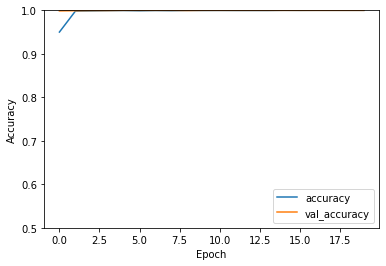

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

# empty와 거리가 100인 상황

In [25]:
label = [0]*3540 + [1]*(2537)  # empty의 0과 나머지를 1로
label = pd.DataFrame(label)
len(label)

6077

In [26]:
train = pd.concat([empty, a0d100], ignore_index=True)
train.shape

(6077, 1016)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(train, label, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4861, 1016) (1216, 1016) (4861, 1) (1216, 1)


In [28]:
# 입력 데이터에 채널 차원 추가 (Conv1D를 위해)
X_train = np.expand_dims(X_train, axis=-1) # 채널 차원 추가
print(X_train.shape)
X_test = np.expand_dims(X_test, axis=-1)
print(X_test.shape)

(4861, 1016, 1)
(1216, 1016, 1)


In [29]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(1016,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 1013, 10)          50        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1009, 20)          1020      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 504, 20)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10080)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10081     
Total params: 11,151
Trainable params: 11,151
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
152/152 [==============================] - 2s 14ms/step - loss: 0.1903 - accuracy: 0.9593 - val_loss: 0.0199 - val_accuracy: 0.9942
Epoch 2/10
152/152 [==============================] - 2s 14ms/step - loss: 0.0248 - accuracy: 0.9949 - val_loss: 0.0097 - val_accuracy: 0.9975
Epoch 3/10
152/152 [==============================] - 2s 14ms/step - loss: 0.0221 - accuracy: 0.9967 - val_loss: 0.0067 - val_accuracy: 0.9975
Epoch 4/10
152/152 [==============================] - 2s 14ms/step - loss: 0.0216 - accuracy: 0.9963 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 5/10
152/152 [==============================] - 2s 13ms/step - loss: 0.0132 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 6/10
152/152 [==============================] - 2s 13ms/step - loss: 0.0124 - accuracy: 0.9988 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/10
152/152 [==============================] - 2s 13ms/step - loss: 0.0129 - accuracy: 0.9990 - val_loss: 0.0052 - val_accuracy: 0.9984

38/38 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000


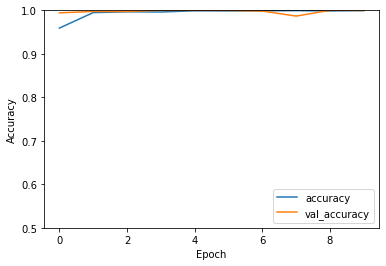

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test)

# 거리가 같을 때 0, 90, 180을 탐지할 수 있는가?

In [32]:
label = [0]*3540 + [1]*2701 + [2]*3076 + [3]*3195  # empty의 0과 각도0을 1로, 90을 2로, 180을 3 이때 거리는 모두 10
label = pd.DataFrame(label)
len(label)

12512

In [33]:
# label = tf.one_hot(label, 4)
label = np.array(label)
label.shape

(12512, 1)

In [34]:
train = pd.concat([empty, a0d10, a90d10, a180d10], ignore_index=True)
train.shape

(12512, 1016)

In [35]:
# 입력 데이터에 채널 차원 추가 (Conv1D를 위해)
X_train = np.expand_dims(train, axis=-1) # 채널 차원 추가
print(X_train.shape)
# Y_train = np.expand_dims(label, axis=-1)
print(label.shape)

(12512, 1016, 1)
(12512, 1)


In [36]:
Y_train = to_categorical(label, num_classes=4)

In [37]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(1016,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 1013, 10)          50        
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1009, 20)          1020      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 504, 20)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10080)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 40324     
Total params: 41,394
Trainable params: 41,394
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5882 - accuracy: 0.7937
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 0.3999 - accuracy: 0.8940
Epoch 3/20
391/391 [==============================] - 5s 12ms/step - loss: 0.2972 - accuracy: 0.9185
Epoch 4/20
391/391 [==============================] - 4s 11ms/step - loss: 0.2131 - accuracy: 0.9418
Epoch 5/20
391/391 [==============================] - 5s 12ms/step - loss: 0.1592 - accuracy: 0.9551
Epoch 6/20
391/391 [==============================] - 5s 12ms/step - loss: 0.1326 - accuracy: 0.9612
Epoch 7/20
391/391 [==============================] - 5s 12ms/step - loss: 0.1019 - accuracy: 0.9718
Epoch 8/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0813 - accuracy: 0.9780
Epoch 9/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0761 - accuracy: 0.9804
Epoch 10/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0611 - accura

# 새롭게 거리를 탐지할 수 있는지 학습시키기

In [4]:
# 정확하기는 10, 50 ,100을 구분할 수 있는지 확인할 것임
label = [0]*2701 + [1]*3347 + [2]*2537  # 각도0인 상태에서 10을 0으로, 50을 1로, 100을 2로
label = pd.DataFrame(label)
len(label)

8585

In [5]:
train = pd.concat([a0d10, a0d50, a0d100], ignore_index=True)
train.shape

(8585, 1016)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(train, label, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6868, 1016) (1717, 1016) (6868, 1) (1717, 1)


In [23]:
# 입력 데이터에 채널 차원 추가 (Conv1D를 위해)
X_train = np.expand_dims(train, axis=-1) # 채널 차원 추가
print(X_train.shape)
# Y_train = np.expand_dims(label, axis=-1)
print(label.shape)

(8585, 1016, 1)
(8585, 1)


In [24]:
Y_train = to_categorical(label, num_classes=4)
print(Y_train.shape)

(8585, 4)


In [25]:
X_test = np.expand_dims(X_test, axis=-1)
print(X_test.shape)
Y_test = to_categorical(Y_test, num_classes=4)
print(Y_test.shape)

(1717, 1016, 1)
(1717, 4)


In [26]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(1016,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\jkwor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 1013, 10)       │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1009, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 504, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        40,324 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,394 (161.70 KB)

 Trainable params: 41,394 (161.70 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6783 - loss: 0.6458 - val_accuracy: 0.9208 - val_loss: 0.3511
Epoch 2/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9123 - loss: 0.2751 - val_accuracy: 0.9313 - val_loss: 0.2944
Epoch 3/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9421 - loss: 0.2151 - val_accuracy: 0.9645 - val_loss: 0.2345
Epoch 4/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.1915 - val_accuracy: 0.9691 - val_loss: 0.2045
Epoch 5/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9582 - loss: 0.1520 - val_accuracy: 0.9621 - val_loss: 0.1484
Epoch 6/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9494 - loss: 0.2092 - val_accuracy: 0.9662 - val_loss: 0.2500
Epoch 7/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9679 - loss: 0.1137 - val_accuracy: 0.9377 - val_loss: 0.5106
Epoch 8/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9607 - loss: 0.2033 - val_accuracy: 0.